In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

df = pd.read_csv("movie_dataset.csv", engine="python")
features = ['budget', 'popularity', 'runtime', 'revenue']
df = df[features]
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df.head()


,budget,popularity,runtime,revenue
0,237000000.0,150.437577,162.0,2.787965e+09
1,300000000.0,139.082615,169.0,9.610000e+08
2,245000000.0,107.376788,148.0,8.806746e+08
3,250000000.0,112.312950,165.0,1.084939e+09
4,260000000.0,43.926995,132.0,2.841391e+08


In [109]:
median_revenue = df['revenue'].median()

df['target'] = np.where(df['revenue'] >= median_revenue, 1, 0)

df = df.drop('revenue', axis=1)

In [111]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42
)

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [113]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',   
    patience=10,          
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,  
    validation_data=(X_val, y_val), 
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


C:\Users\John Lyster\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7799 - loss: 0.5244 - val_accuracy: 0.7814 - val_loss: 0.4353
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4342 - val_accuracy: 0.8000 - val_loss: 0.4198
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.4207 - val_accuracy: 0.7979 - val_loss: 0.4119
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4149 - val_accuracy: 0.7979 - val_loss: 0.4051
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.4110 - val_accuracy: 0.7959 - val_loss: 0.4017
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.4075 - val_accuracy: 0.8103 - val_loss: 0.4009
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4082 - val_accuracy: 0.8062 - val_loss: 0.3955
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8098 - loss: 0.4083 - val_accuracy: 0.8062 - v


Final Validation Accuracy: 80.21%


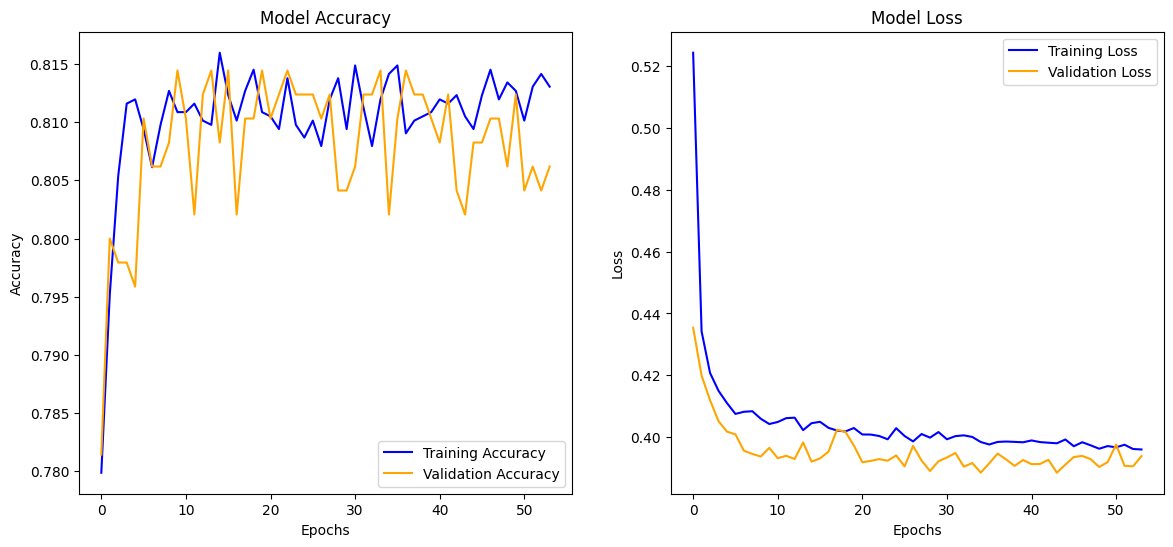

In [114]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2 , 2)
    plt.plot(epochs_range, loss, label='Training Loss', color='blue')
    plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"\nFinal Validation Accuracy: {accuracy * 100:.2f}%")
plot_results(history)


In [ ]:
model.save_weights("movie_revenue_model_weights.weights.h5")
fresh_model = Sequential()
fresh_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
fresh_model.add(Dense(32, activation='relu'))
fresh_model.add(Dense(16, activation='relu'))
fresh_model.add(Dense(1, activation='sigmoid'))
fresh_model.load_weights("movie_revenue_model_weights.weights.h5")

print("Weights saved and loaded into a fresh architecture!")

fresh_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Weights saved and loaded into a fresh architecture!


C:\Users\John Lyster\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
loss, acc = fresh_model.evaluate(X_val, y_val)
print("Loaded Model Accuracy:", acc * 100, "%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.2661  
Loaded Model Accuracy: 87.93342709541321 %
